# MeerKAT primary beam approximation
from **1934-638 Beam offsets** by Tom Mauch

In [40]:
import scipy.special as s
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/lib/python2.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['power', 'f', 'test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [41]:
def jincsquare(x):
    e=x+1e-9 # fugde offset to avoid 0/0
    y=2*(s.j1(e))/(e)
    return y*y

In [42]:
def x(offset,theta):
    # theta is full width half max
    x=3.23267*offset/theta
    return x
    

In [43]:
def fwhm(fr,pol):
    """
    freq in MHz
    wavelength in meters
    """
    wavel=2.998e2/fr
    print wavel
    if pol =="H":
        w=1.028*wavel/12.2 #radians
    else:
        w=1.028*wavel/11.8
    arcmin=np.degrees(w)*60
    return arcmin
    

In [44]:
def fwhmH(fr):
    """
    freq in MHz
    wavelength in meters
    """
    wavel=2.998e2/fr
    w=1.028*wavel/12.2 #radians
    arcmin=np.degrees(w)*60.
    return arcmin
def fwhmV(fr):
    wavel=2.998e2/fr
    w=1.028*wavel/11.8
    arcmin=np.degrees(w)*60.
    return arcmin

In [45]:
t=np.linspace(-2.0,2.0,11)
print t,jincsquare(t)


[-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ] [0.3326115  0.5074709  0.68969996 0.85027784 0.96066048 1.
 0.96066048 0.85027784 0.68969996 0.5074709  0.3326115 ]


In [46]:
print fwhm(1317.23,"H")
print fwhm(1519.94,"V")

0.227598824807
65.9291052880095
0.197244628077
59.07315606425599


In [47]:
print fwhmH(1448.05), fwhmV(1448.05)

59.972925906235815 62.005906445430234


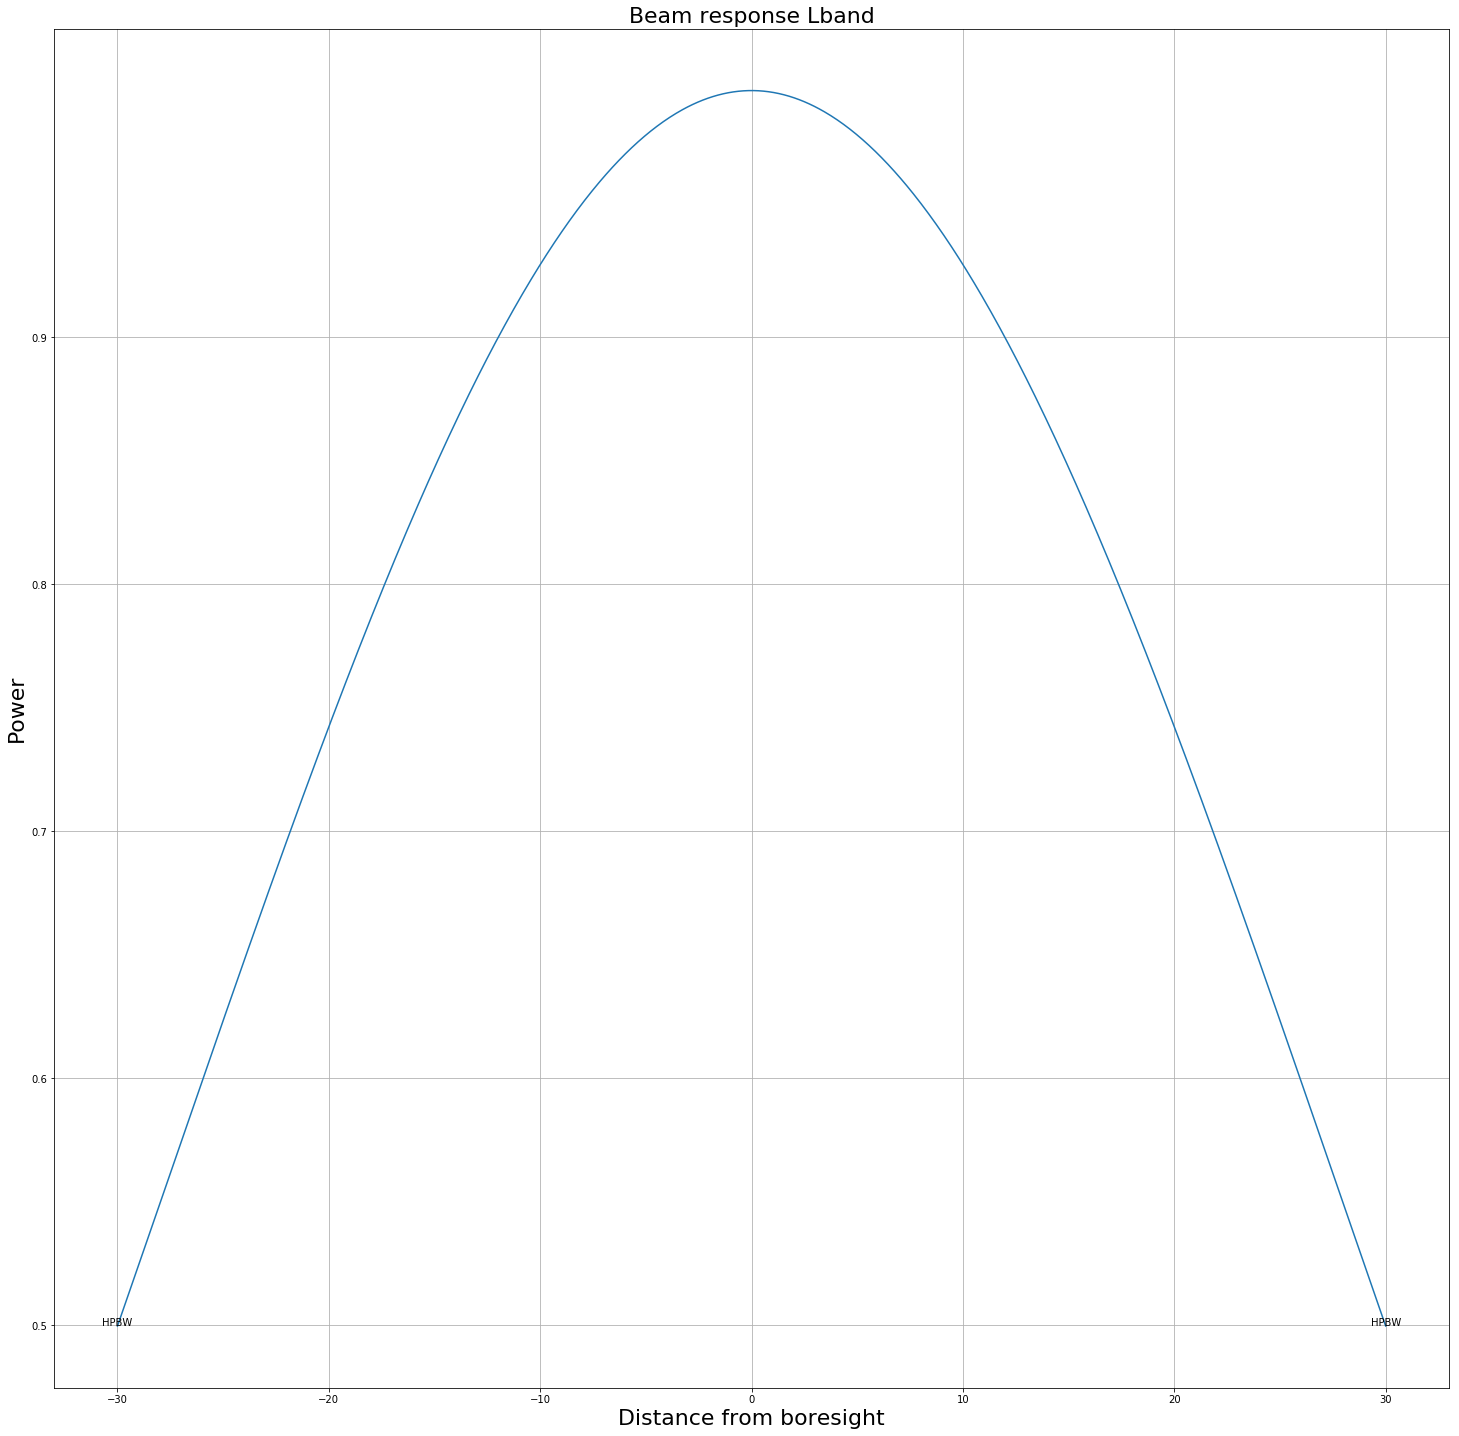

In [48]:
figsize(25,25)
grid('on')
off=np.linspace(-30,30,1000) #arcmin - only measured from -60 to +60
fr=1448.05 #MHz
theta=fwhmH(fr) #arcmin
t=x(off,theta) #ratio
power=jincsquare(t)
annotate('HPBW',(30,0.5),ha='center')
annotate('HPBW',(-30,0.5),ha='center')
title("Beam response Lband",fontsize=22)
xlabel("Distance from boresight",fontsize=22)
ylabel("Power",fontsize=22)
yticks(np.arange(0.,1.,.1))
xticks(np.arange(-60,70,10))
plot(off,power)


In [49]:
print theta, jincsquare(1.61634) #width in arcmin, and half max

59.972925906235815 0.49999997593285916


In [50]:

print jincsquare(x(71.12,60.)) #expect null at 71 arcmin

3.233334279769444e-10


0.5000022598073408


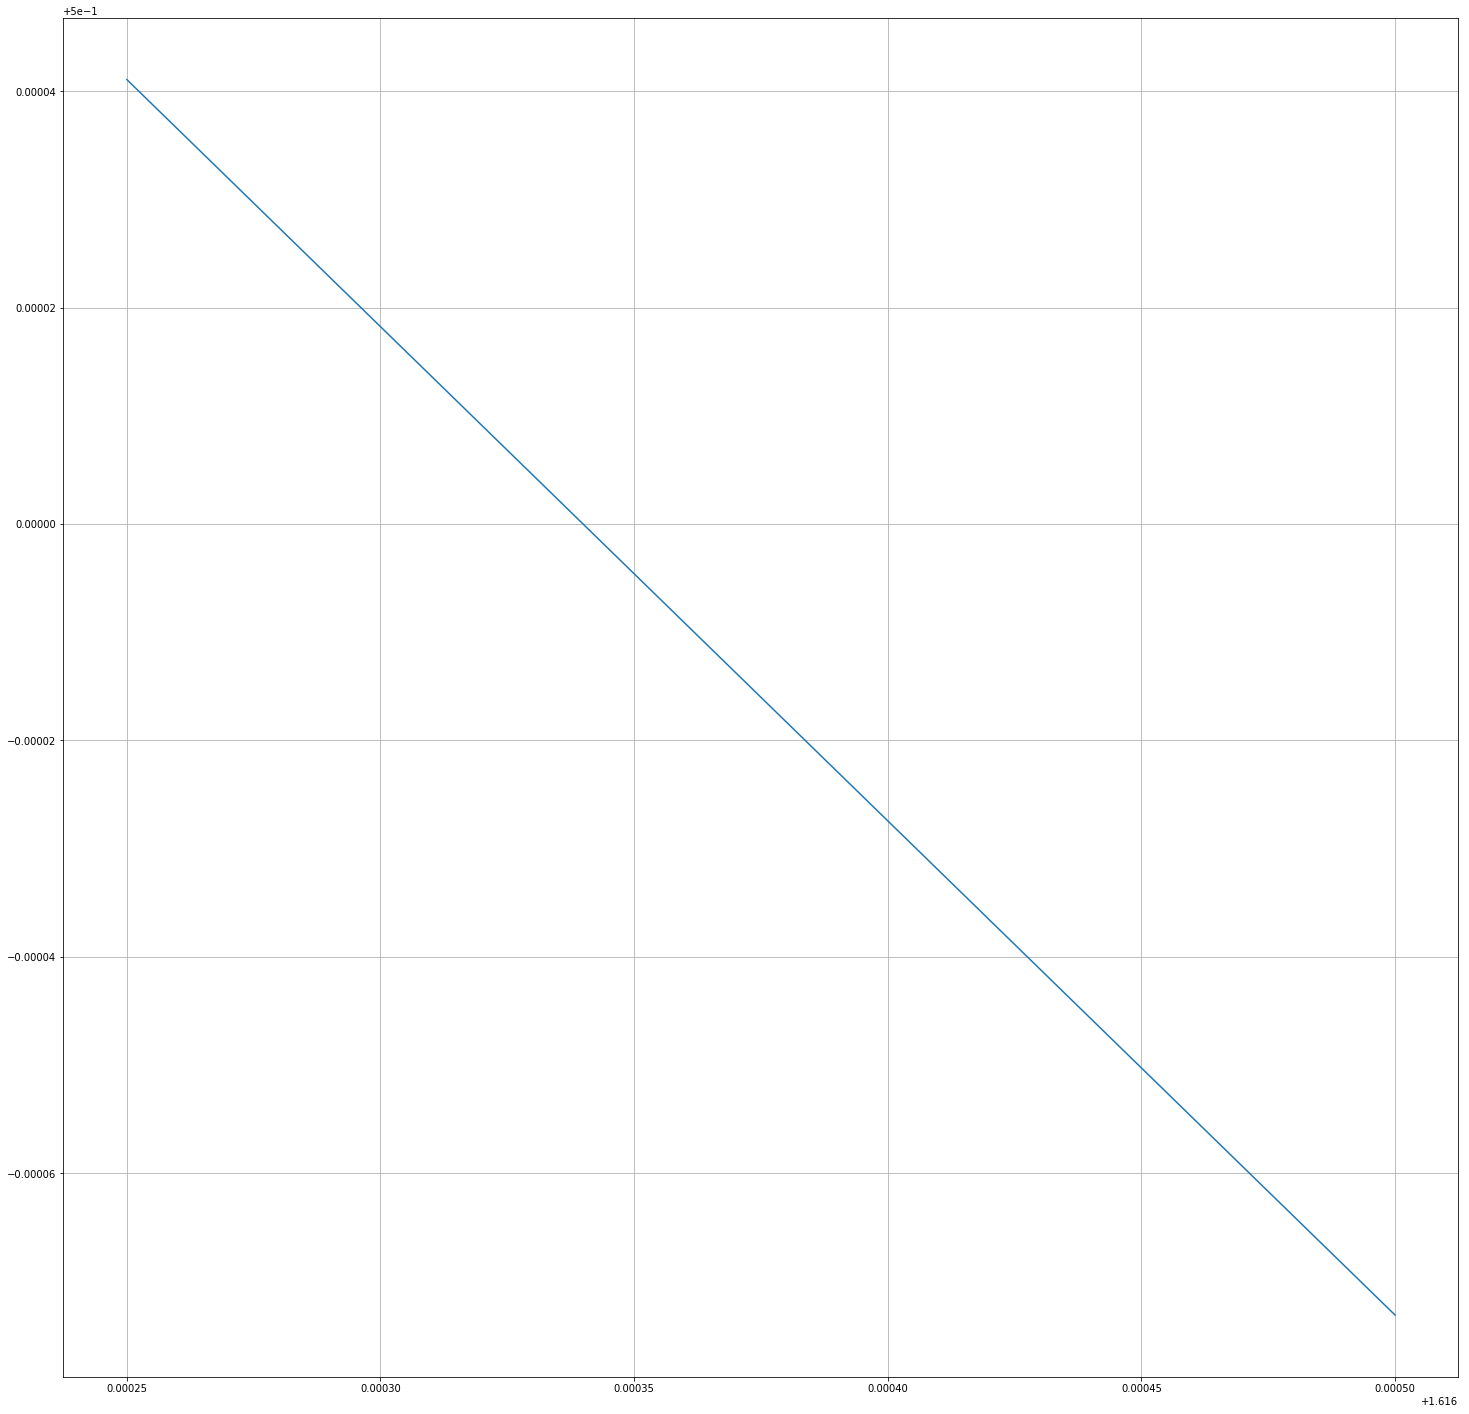

In [51]:
test=np.linspace(1.61625,1.61650,50)
grid('on')
plot(test,jincsquare(test))
print jincsquare(3.23267/2.0)

In [52]:
def slope(f,x):
    dx=1e-7
    sl=(f(x+dx)-f(x-dx))/(2*dx)
    return sl

def f(x):
    cu=x*x*x
    return cu

print slope(f,1.0)

3.00000000009


-0.46042951562519363
-0.46042951562519363


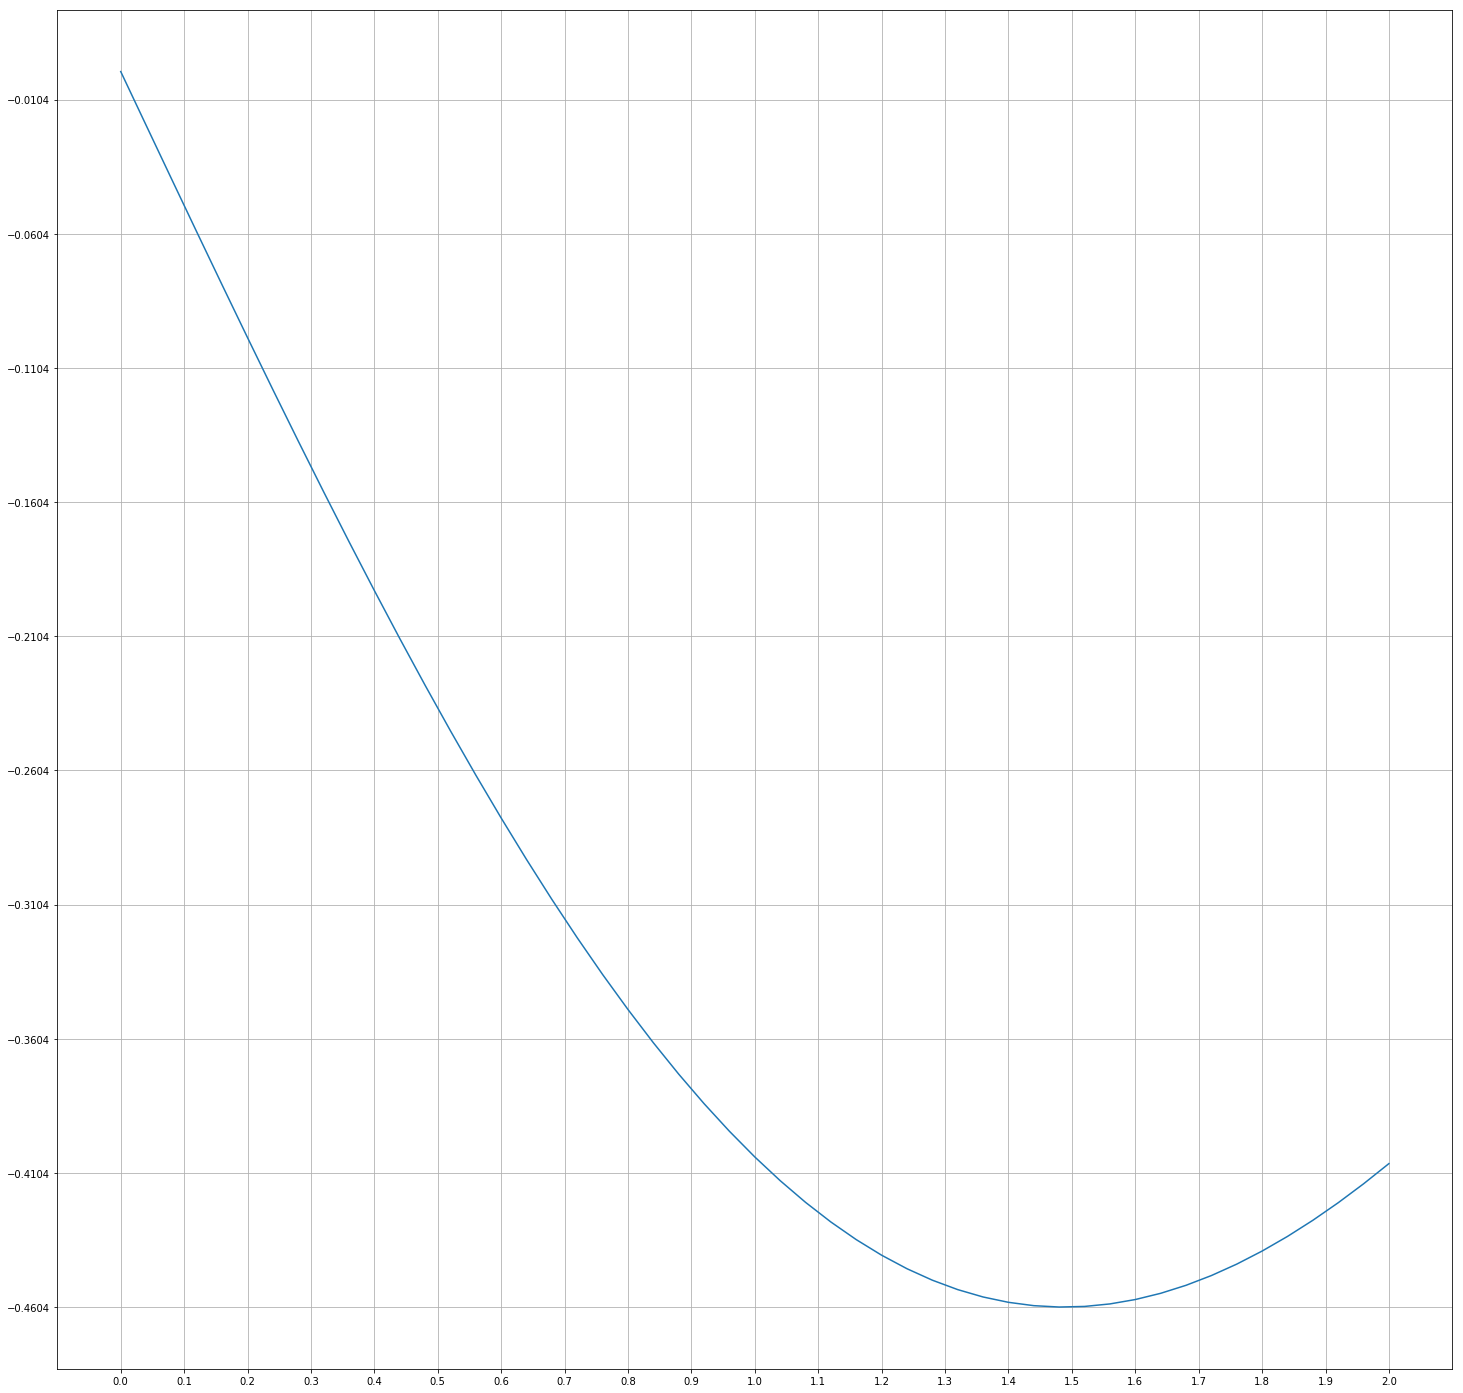

In [53]:
theta=np.linspace(0,2,51)
print slope(jincsquare,1.48)
s=slope(jincsquare,theta)
print min(s)
grid('on')
yticks(np.arange(min(s),max(s)+0.05,0.05))
xticks(np.arange(min(theta), max(theta)+0.1, 0.1))
plot(theta,s)

# Condon and Ransom 2016
# $cos^2$ version

In [54]:
def cos2(r,theta):
    t=theta/60.0 #min to deg
    # r in degrees theta in arcmin
    x=1.189*r/t
    #print x
    a=(np.cos(x*np.pi)/(1 - 4*x**2))**2
    return a

In [55]:
def db(y):
    return 10*np.log10(y)

In [56]:
print cos2(1.5,59.0)

0.0047007544202083175


In [57]:
f= 1500. #MHz
theta= fwhmH(f)
print theta, theta/60.

57.89586357234983 0.9649310595391639


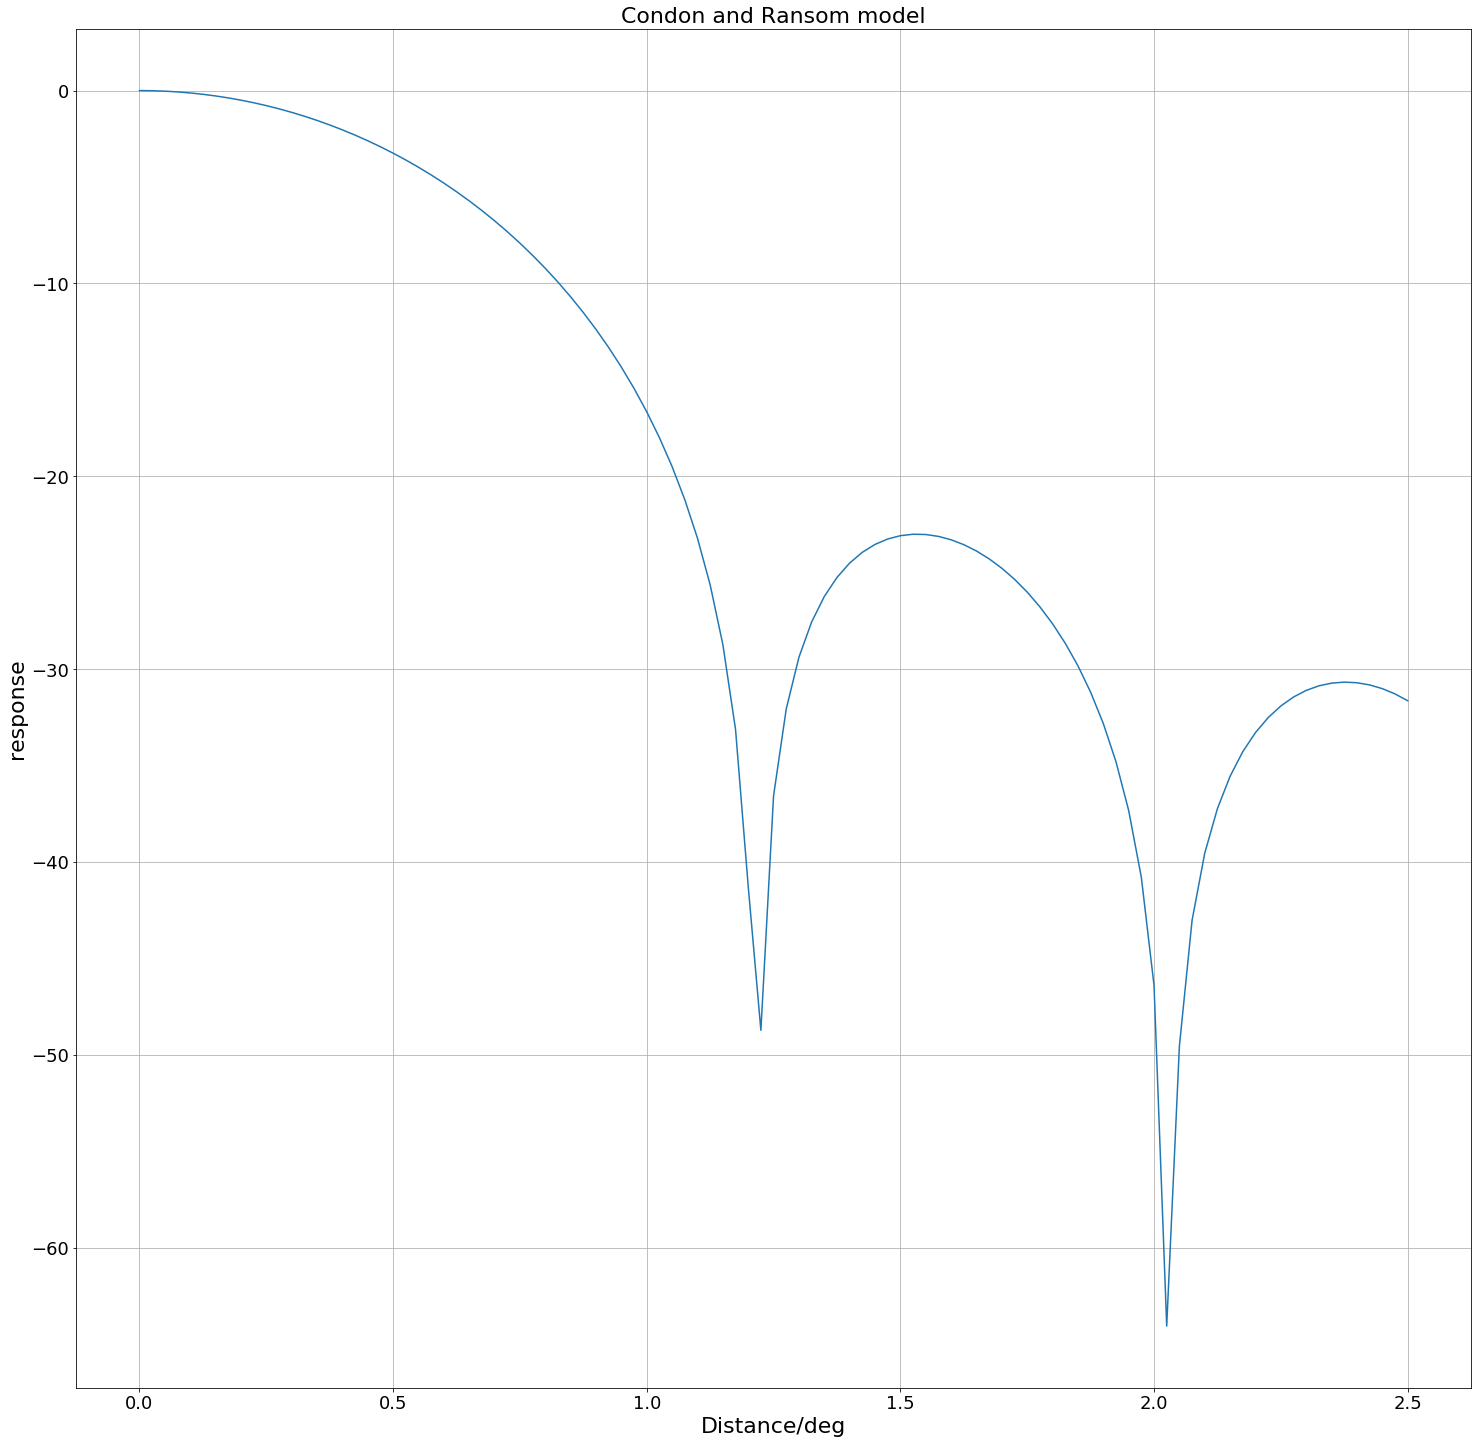

In [58]:
r=np.linspace(0,2.5,101)
rc('font',size=18)
fs=22 # font size
title("Condon and Ransom model",fontsize=fs)
plot(r,db(cos2(r,theta)),label="response")
#ylim(0.0,1.0)
xlabel("Distance/deg",fontsize=fs)
ylabel("response",fontsize=fs)
grid('on')

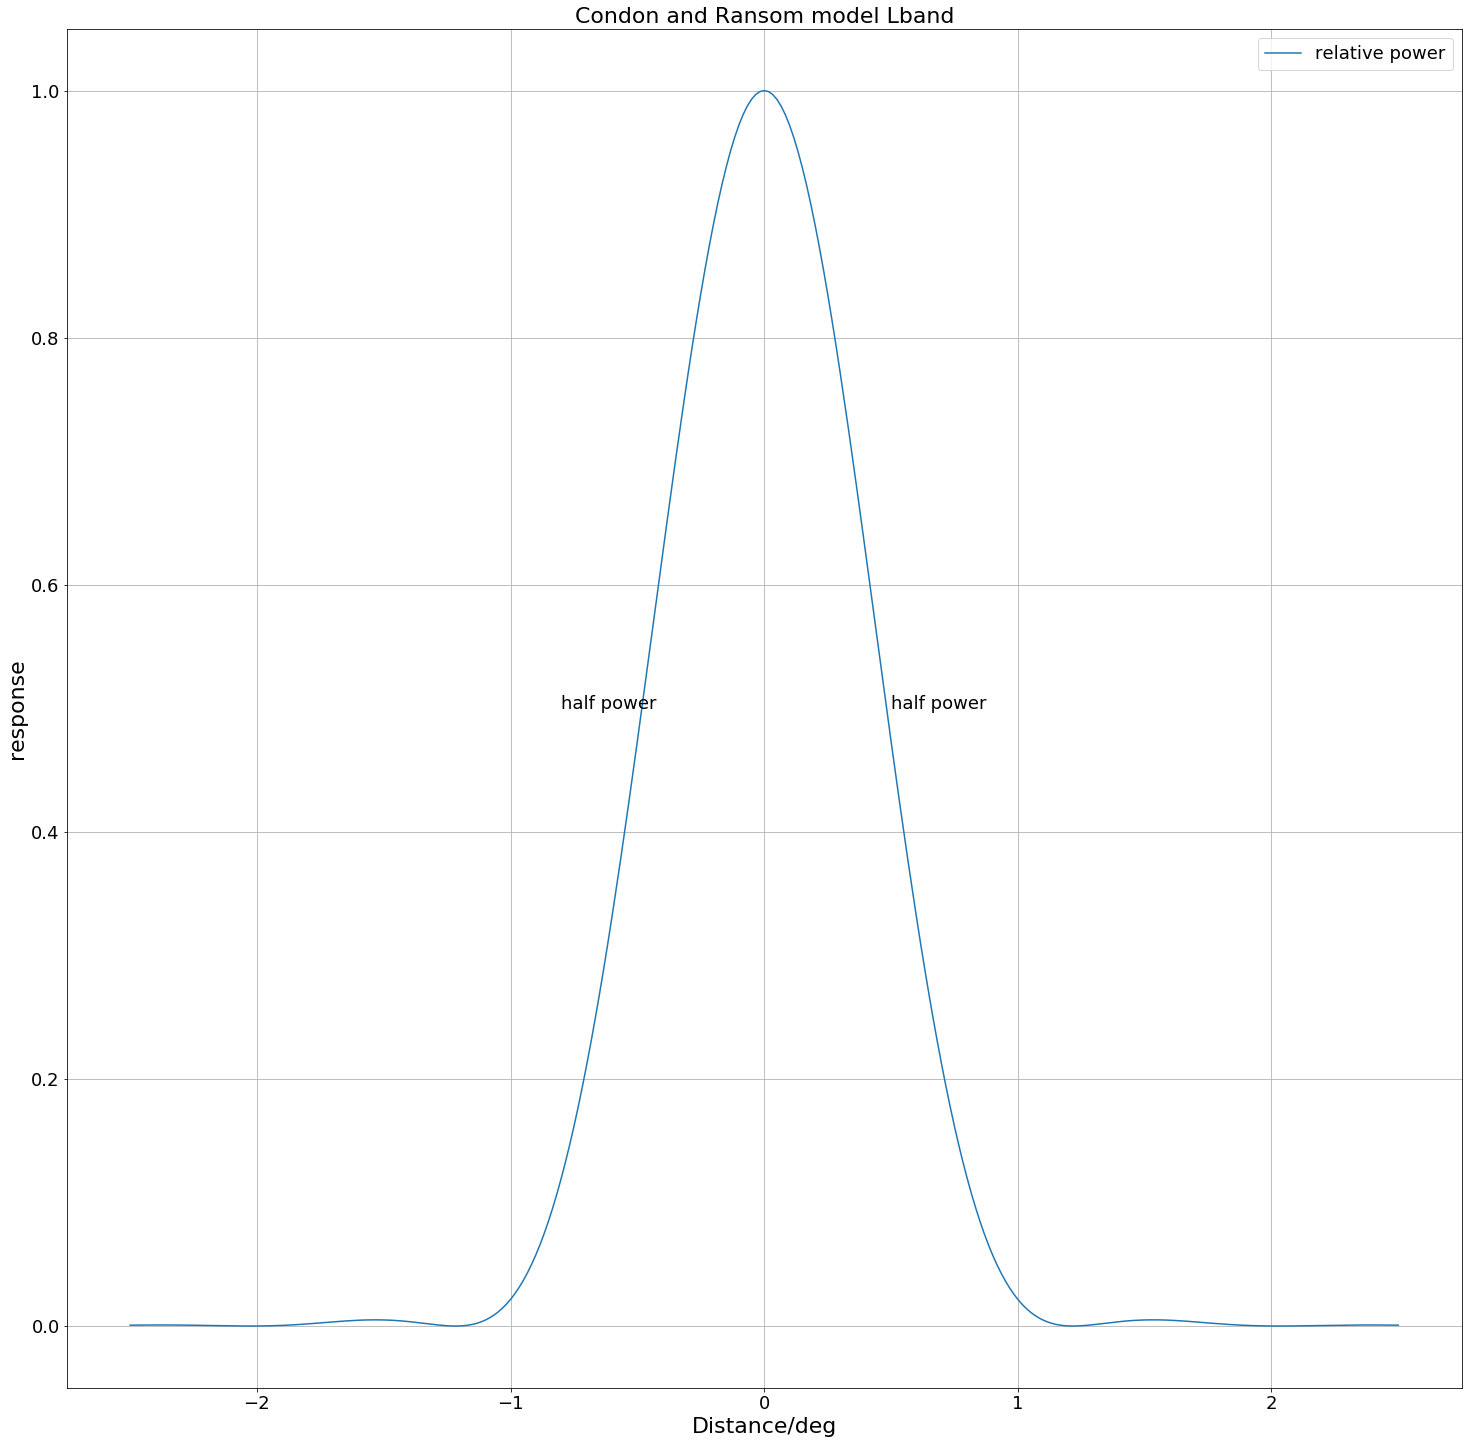

In [72]:
r=np.linspace(-2.5,2.5,301)
rc('font',size=18)
fs=22 # font size
title("Condon and Ransom model Lband",fontsize=fs)
plot(r,cos2(r,theta),label="relative power")
#plot(r,0.5,label="half power")
legend()
#ylim(0.0,1.0)
xlabel("Distance/deg",fontsize=fs)
ylabel("response",fontsize=fs)
annotate("half power",(0.5,0.5))
annotate("half power",(-0.8,0.5))
grid('on')
savefig("Antenna response.png")